In [137]:
# Always reload imports if the file is changed on disk - this makes your changes in actr.py visible to the notebook
%load_ext autoreload
%autoreload 2

# Import matplotlib and allow your graphs to show up in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
from math import log
import pandas as pd
#import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
import actr # Make a file named actr.py so that this import line works

## Build an ACT-R Model

In this problem, you'll build a simplified ACT-R learner to recognize the past-tense of English verbs. This problem illustrates that while ACT-R is built on production rules, it also uses lots of machinery we'll talk about more later in the term, such as varying activation of production rules in order to capture the fact that people act differently in different situations. For this problem, you'll create a python module named `actr.py`. Place this file in the same directory as this notebook.
    
Included with the problem set are three files relevant to this problem: [verbChunks.txt](data/verbChunks.txt), [childesFrequency.txt](data/childesFrequency.txt), and [lags.txt](data/lags.txt). `verbChunks.txt` contains 10 English verbs. The first column is the name of the verb, the second column is the stem of the past tense of the verb, and the third column is the suffix of the past tense. `childesFrequency.txt` is the parental frequency count of each past tense verb in the [CHILDES corpus](https://childes.talkbank.org/) (Li & Shirai, 2000). CHILDES is a collection of transcripts of speech between children and parents (and occasionally experimenters); parental frequency count is how often a particular word was used by an adult. `lags.txt` is a collection of hypothetical time lags that might have elapsed since seeing instances of each of the past tense forms. Each of the ten columns in lags corresponds to a past tense form from chunks. The time lag in each row of lags is from a different instance of seeing that chunk. The number of lags for a chunk is (roughly) equal to the number of times that word was seen divided by 10; the lags are to a sampling of the occurrences rather than all of them, but you can generally ignore this fact when working through this problem.

### Baseline activations

The baseline activation of a chunk for an ACT-R learner is:
        \begin{align}
            \text{activation} = \ln \sum_{\text{lag} \in \text{lags}} \text{lag}^{-d},
        \end{align}
        where the sum is over the collection of time lags for a single verb, $d$ is the decay parameter of the model, and $\ln$ is a logarithm with base $e$ ("natural log"). 

<div class="alert alert-success" role="alert">
<h3>Part (a)</h3>
<p>
In your `actr.py` module, create:
<ul>
<li> A function `baseline\_activation` that takes two parameters: a float $d$ and a list of lags, and returns the baseline activation for a chunk with the given lag times.
<li> A function `compute\_all\_baselines` that takes one filename as a parameter: this should be a file of time lags (like `lags.txt`, although as with all homework specifications, anything in the same format - same columns - should work) with each column corresponding to one verb. This function should return a list of all baseline activations. Assume that we use a default decay parameter of $0.5$; we'll keep this decay parameter the same for the remainder of the problem. 
</ul>

In the cell below, use your module to compute the baseline activations for the verbs in the Childes data. This cell should also create a bar graph showing the baseline activations for these verbs. Like all graphs you create for this class, you should make sure both axes are labeled and the graph should have a title.
</div>

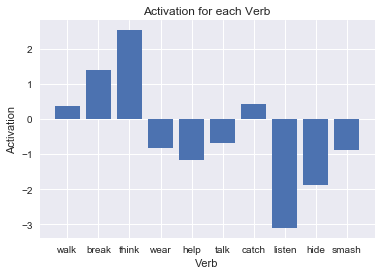

In [144]:
activation = actr.compute_all_baselines("data/lags.txt")
words = ['walk','break','think','wear','help','talk','catch','listen','hide','smash']
fig, ax = plt.subplots()
fig = plt.bar([i for i in range(len(activation))],activation)
plt.ylabel("Activation")
plt.xlabel("Verb")
plt.title("Activation for each Verb")
ax.set_xticks(range(10))
ax.set_xticklabels(words)
plt.show()

<div class="alert alert-success" role="alert">
<h3>Part (b)</h3><p>
Examine the baseline activation of “hide” versus “smash”. Which one has a higher activation? In the cell below, explain why this word has a higher activation, making reference both to how the activation is computed and the values for the time lags. Your explanation should help the reader make sense of the relationships between time lags and activations - it shouldn’t just say something like “the formula gives a higher number for word1 versus word2.”

'Smash' has a higher activation than 'hide.' This is because hide had far larger lag values than smash. Therefore the inverses will be smaller and therefore log will be more negative. 

### Relating baseline activation and frequency

<div class="alert alert-success" role="alert">
<h3>Part (c)</h3><p>
Explain the relationship between the frequency of each verb (in `childesFrequency.txt`) and the baseline activations. In general, what sort of pattern do you observe and why? Include in this section the code to create a scatter plot where the frequency of each verb is on the x-axis and the baseline activation for that verb is on the y-axis.

There seems to be an increasing correlation between frequency and activation for each verb. It grows at an approximately logarithmic rate.

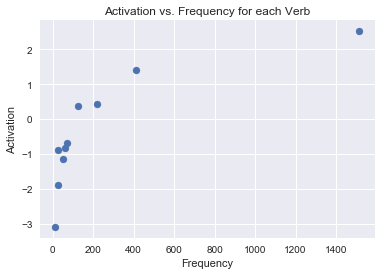

In [123]:
frequency = [125,411,1515,62,53,73,219,11,25,26]
fig, ax = plt.subplots()
fig = plt.scatter(x=frequency, y=activation)
plt.ylabel("Activation")
plt.xlabel("Frequency")
plt.title("Activation vs. Frequency for each Verb")
plt.show()

### Retrieval

The activation of a chunk controls how easy it is to retrieve from memory. We assume an activation threshold of $\tau = 0.3$: a chunk can only be retrieved from memory if its activation is greater than 0.3. 

<div class="alert alert-success" role="alert">
<h3>Part (d)</h3><p>
Given the activations you computed in part (a), which past tense forms can be retrieved from memory by this learner? In the cell below, include code that computes and displays your answer. 
</div>

In [173]:
allWords = dict(zip(words,activation))
pastTense = {}
for verb in allWords:
    if allWords[verb]>0.3:
        pastTense[verb]= allWords[verb]
try: #in case they don't have pandas
    df = pd.DataFrame.from_dict(pastTense, orient='index')
    df.columns = ['activation']
    print(df.sort_values('activation', ascending = False))
except:
    print(pastTense)

       activation
think    2.532696
break    1.403451
catch    0.427515
walk     0.385967


This learner can retrieve 'walk', 'break', 'think', and 'catch' in past tense.

<div class="alert alert-success" role="alert">
<h3>Part (d, continued)</h3><p>
Imagine there's a word that has only been seen once (so there's exactly one time lag). For how long after exposure could the learner retrieve this word from memory, assuming the default decay and activation thresholds? Explain your answer, including showing relevant work (math or coding) and a short text explanation.
</div>

$\begin{aligned}
\text{activation} &> \ln \sum_{\text{lag} \in \text{lags}} \text{lag}^{-d}\\
0.3 &> \ln \sum_{\text{lag} \in \text{lags}} \text{lag}^{-0.5}\\
& \ln \sum_{\text{lag} \in \text{lags}} \text{lag}^{-0.5} =  \ln \text{lag}^{-0.5} &\text{because there is only one lag}\\
0.3 &> \ln\left(\frac{1}{\text{lag}^{0.5}}\right)\\
e^{0.3}&>\frac{1}{\text{lag}^{0.5}}\\
\frac{1}{e^{0.3}}&>\text{lag}^{0.5}\\
\left(\frac{1}{e^{0.3}}\right)^2&>\text{lag}\\
0.548812 &> \text{lag}
\end{aligned}$

To solve for the maximum lag for only seeing a word once, we plug in the values of this equation into the innequality. The maximum lag for the learner to retrieve the word from memory is 0.548812 time since retrieval. 

### Time lags and retrieval

<div class="alert alert-success" role="alert">
<h3>Part (e)</h3><p>
Imagine there are two different words. Both have been seen by the learner ten times. Create two different series of time lags such that the first word is retrievable from memory but the second word is not. Write down these timelags in the cell below, and demonstrate that the first word is retrievable from memory and the second is not.

In [143]:
lag1 = [1,2,3,4,5,6,7,9,10]
lag2 = [100,101,102,103,104,105,106,107,108,109,110]
print('Series 1')
print('Word 1 activation = ',actr.baseline_activation(0.5,lag1), '\t > 0.3 -> the first word is retrievable from memory')
print('Word 2 activation = ',actr.baseline_activation(0.5,lag2), '\t < 0.3 -> the second word is not retrievable from memory')

Series 1
Word 1 activation =  1.5406117074930927 	 > 0.3 -> the first word is retrievable from memory
Word 2 activation =  0.0712555768581632 	 < 0.3 -> the second word is not retrievable from memory


### Retrieval time

For chunks that have high enough activation to be retrieved, retrieval time $t$ is computed as $t = F\cdot \exp(-fA)$, where $A$ is the baseline activation and $F, f$ are parameters of the model. $\exp$ means the mathematical constant $e$ raised to a particular power; for instance, $\exp(-fA) = e^{-fA}$. 

<div class="alert alert-success" role="alert">
<h3>Part (f)</h3><p>
In your `actr.py` module, write a function `retrieval\_time` that takes three parameters: (1) the activation, (2) $F$, and (3) $f$. This function should return the retrieval time for the chunk. 
<p><p>
In the cell below, use $F = 0.5$ and $f = 0.25$ to compute the retrieval time for all the past tense forms that have high enough activation to be retrieved. Print out the retrieval times, labeled with which verbs they refer to.

In [183]:
#put function here
f= 0.25
F = 0.5
rTime = actr.retrieval_time(activation,f,F)

rTimeWords = dict(zip(words,rTime))
try: #in case they don't have pandas
    df = pd.DataFrame.from_dict(rTimeWords, orient='index')
    df.columns = ['Retrieval Time']
    print(df.sort_values('Retrieval Time',ascending=False))
except:
    print(rTimeWords)

        Retrieval Time
listen        1.086735
hide          0.800533
help          0.667495
smash         0.625509
wear          0.615275
talk          0.591849
walk          0.454009
catch         0.449317
break         0.352040
think         0.265452


 <div class="alert alert-success" role="alert">
<h3>Part (g)</h3>
<p> Experiment with different values of $f$, restricting yourself to values in between 0 and 1. In the cell below, describe the pattern of how the magnitude of this parameter affects the retrieval time. You should include evidence from your experimentation to support the pattern you describe (you can include this evidence in additional cells, interspersed with text in any way that helps you explain the pattern).

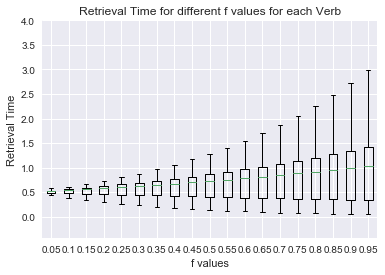

In [212]:
#calculate retrival time for different f values
data= [actr.retrieval_time(activation,f/20,F) for f in range(1,20)]
fig2, ax = plt.subplots()
fig2 = plt.boxplot(data, autorange=True)
plt.ylabel("Retrieval Time")
plt.xlabel("f values")
plt.title("Retrieval Time for different f values for each Verb")
ax.set_xticks(range(1,20))
ax.set_xticklabels([f/20 for f in range(1,20)])
plt.ylim(top=4) 
plt.show()

As the f value increases, the retrieval time increases.

### Utilities

An ACT-R learner only retrieves chunks from memory when retrieval is requested by a production rule. Production rules are selected according to their utility. The utility of a production rule $i$ is given by $U_{i} = P_{i}\cdot G - C_{i}$, where $P_i$ is the probability of success, $G$ is the value of the current goal, and $C_i$ is the cost
for using this rule (measured in units of time). We will assume that the value $G$ of creating a past tense form is equal to $5$. We will further make the simplifying assumption that the learner only has two possible rules for creating past tense forms: the regular past tense rule (``add -ed'') and the retrieval rule. 



 <div class="alert alert-success" role="alert">
<h3>Part (h)</h3>
<p>The regular past tense rule always succeeds in producing a past tense form, so $P_i=1$ for this rule. The cost $C_i$ for the regular rule is stipulated as a phonetic post-processing cost of $1.2$.
<br><br>
In your module `actr.py`, write a function `regular\_utility` that takes no parameters and uses these default values to compute the utility of the regular rule; the function should return the rule's utility. 

 <div class="alert alert-success" role="alert">
<h3>Part (i)</h3>
<p>
To compute the retrieval rule's utility, we need to average over the words that our learner will want to produce. We assume that our learner tries to produce forms in the lexicon according to their frequencies.  This probability of success, $P_i$, can be computed as the ratio of the total frequency of words above the activation threshold $\tau$ to the total frequency of all words. You also need to know the average cost $C_i$, which is equal to the average retrieval time. The average retrieval time is the average of the retrieval times for all words in the vocabulary that can be retrieved, weighted by their frequency. For instance, assume there are two words in the vocabulary: word1 has retrieval time 2 and frequency 10, and word2 has retrieval time 1 and frequency 1. The average retrieval time is $(2\times 10 + 1\times 1)/(10+1)$. Words that cannot be retrieved do not count towards the cost.

In `actr.py`, write a function `retrieval\_utility` which takes two parameters: (1) the path for a frequency file (like `data/childesFrequency.txt`) and (2) the path for a time lags file (like `data/lags.txt`). This function should return the utility of the retrieval rule based on the given frequencies and lags.  When calculating retrieval times, assume $F = 0.5$, $f = 0.25$, and $G = 5$. 

Use your function to compute the utility of the retrieval rule given the data you have been provided, and print out the results in the cell below for the utility of the regular rule and the utility of the retrieval rule.

In [243]:
print('regular utility =',actr.regular_utility())
print('retrieval utility =', actr.retrieval_utility("data/childesFrequency.txt","data/lags.txt"))

regular utility = 3.8
retrieval utility = 4.19471722128


 <div class="alert alert-success" role="alert">
<h3>Part (j)</h3>
<p>
Assume the learner always starts by using the rule with higher utility, and then if the first rule fails (i.e., can't be executed with this word), uses the rule with lower utility. Given the data distributed with the problem set, which past tense forms will your learner produce correctly? Which past tense forms will your learner over-regularize? Over-regularizing is when a rule like ``add -ed'' is used for verbs it shouldn't be, such as saying ``I thinked'' rather than ``I thought.'' Write your answers in the cell below, showing any work supporting your answers.

Ordered by activation, the retrieved words are 'think', 'break', 'catch', 'walk.' So this learner will first try to do 'ink' -> 'ought' befored it tries 'eak' -> 'oke' before it tries 'atch' -> 'aught' before it tries '+ed'. For the other words it will try these words in this order. It will overgeneralize wear and hid, trying to add +ed to them because none of the other rules worked for these worked. It will do a produce 'help' ,'talk', 'listen', and 'smash' correctly because the +ed rule will work for them and none others will. Verbs like drink with 'ink' parts would also be overgeneralized to 'draught.'

### Overregularization and ACT-R

 <div class="alert alert-success" role="alert">
<h3>Part (j)</h3>
<p>
Some studies of children's overregularization have found that children start off not overregularizing the verbs they know, then overregularize for a period of time, and then finally consistently produce correct verbs. Could this pattern be consistent with this simplified ACT-R model? Explain why or why not, making reference to trends in the data that you might expect to see and how this would or would not lead to the proposed pattern.

The data in this model has shown that once a word has been seen enough times and recently enough, the activation will be high enough to correctly form the past-tense of the word. Therefore, it is consitent with the pattern of overgeneralizing until it sees it enough times. We should expect to see an approximately log growth in accuracy because that is the rate that the activation grows. 